<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Sep_8_9/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
#Data taken from https://www.kaggle.com/datasets/goyalshalini93/car-data

df=pd.read_csv("/content/drive/MyDrive/Machine_Learning/CarPrice_Assignment.csv")

In [10]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#Separate Numerical and  Categorical data

In [12]:
tipo_de_dato = df.dtypes

# Crear listas para almacenar las columnas numéricas y categóricas
columnas_numericas = [columna for columna, tipo in tipo_de_dato.items() if pd.api.types.is_numeric_dtype(tipo)]
columnas_categoricas = [columna for columna, tipo in tipo_de_dato.items() if not pd.api.types.is_numeric_dtype(tipo)]


print("Columnas Numéricas:")
print(columnas_numericas)

print("\nColumnas Categóricas:")
print(columnas_categoricas)

Columnas Numéricas:
['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

Columnas Categóricas:
['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [13]:
#Analiza la dependencia del valor del auto como función de cada variable categorica

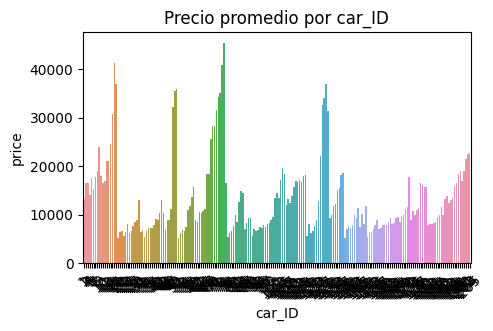

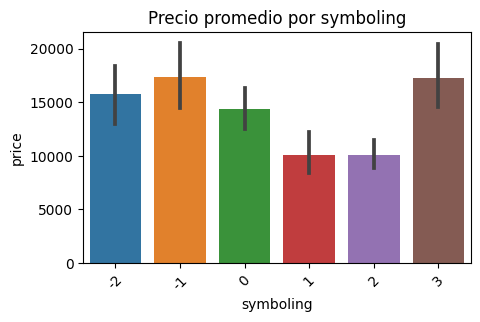

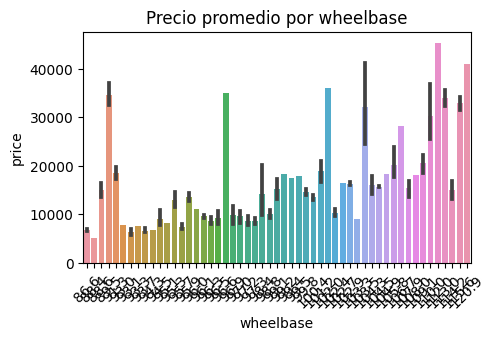

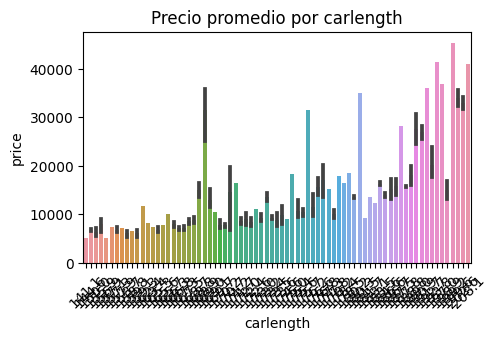

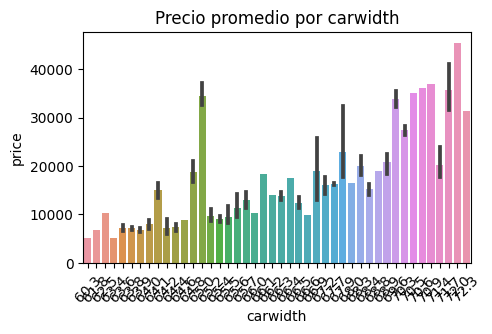

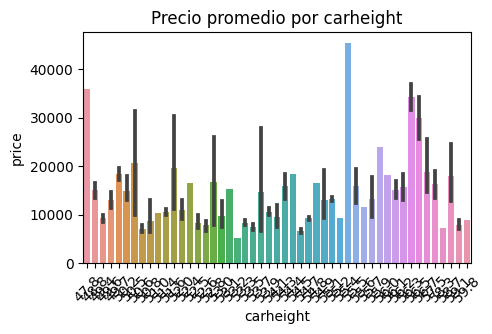

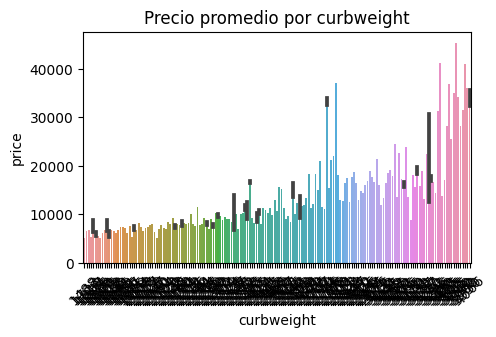

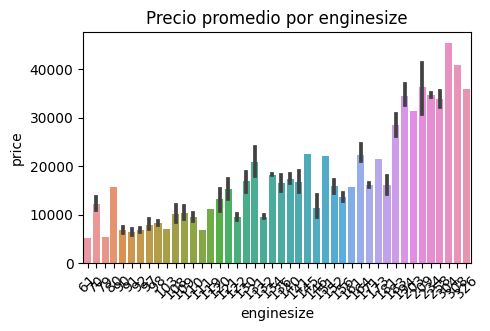

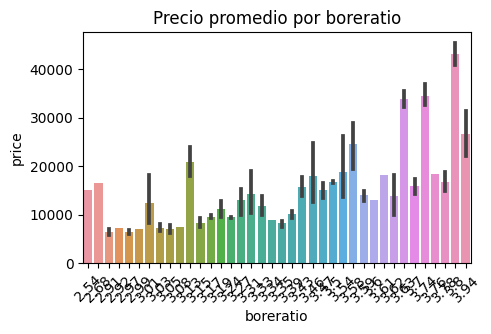

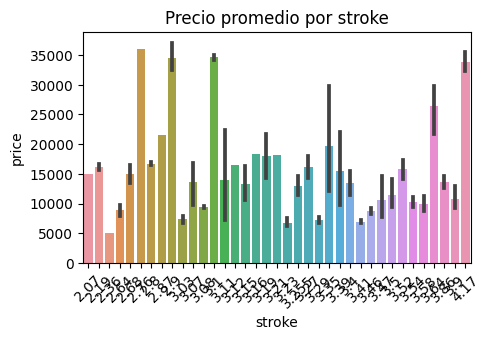

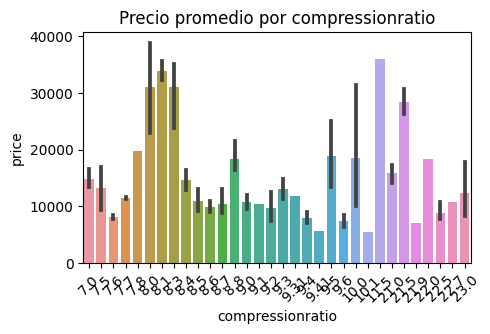

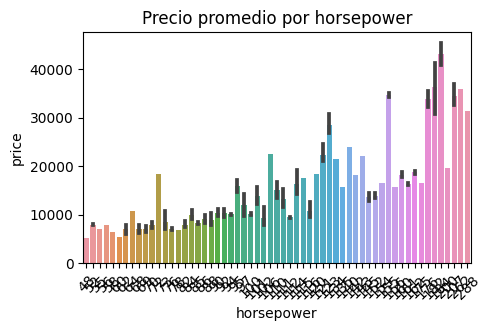

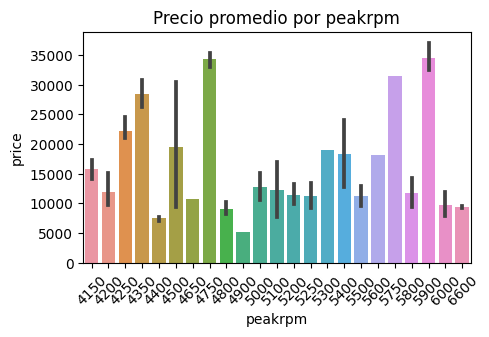

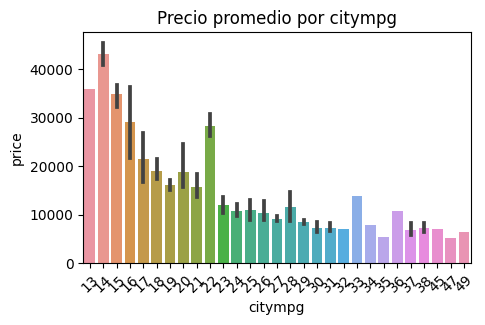

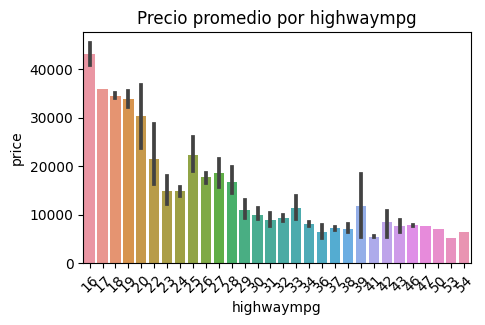

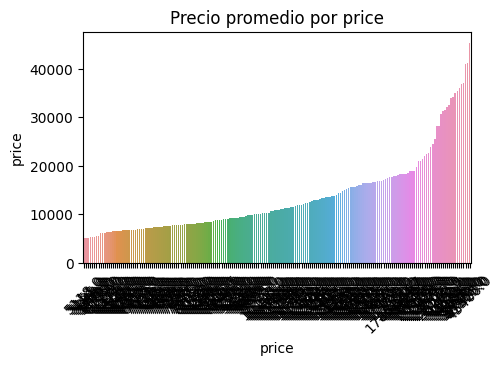

In [14]:
for columna_numerica in columnas_numericas:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=columna_numerica, y='price', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Precio promedio por {columna_numerica}')
    plt.show()

In [15]:
#Analiza la dependencia del valor del auto como función de cada variable numerica

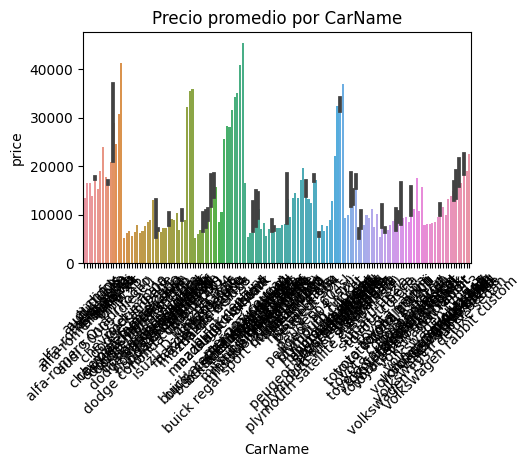

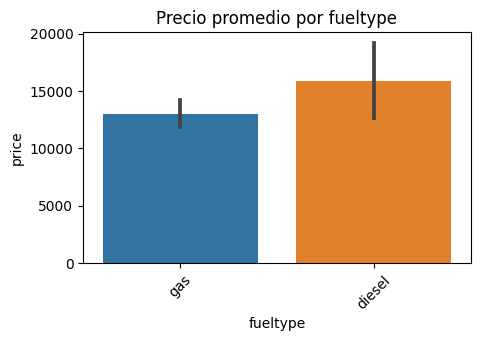

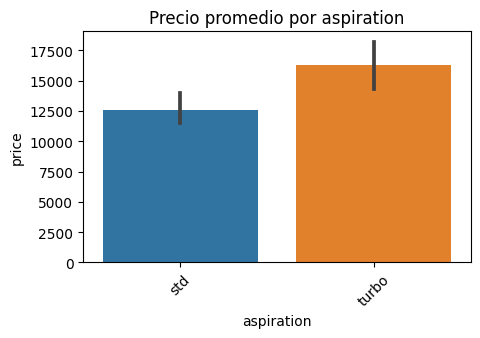

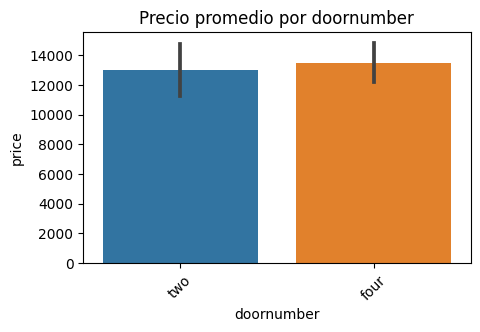

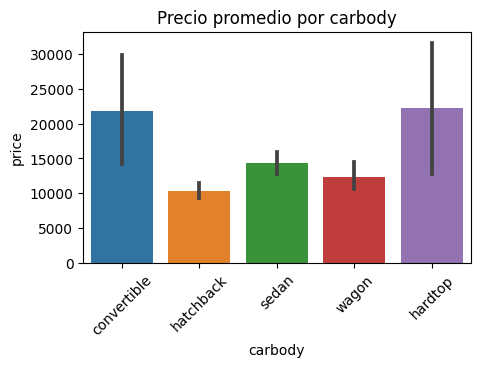

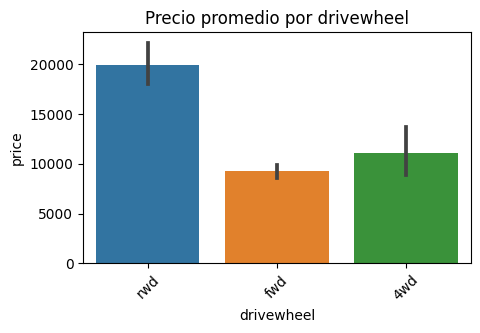

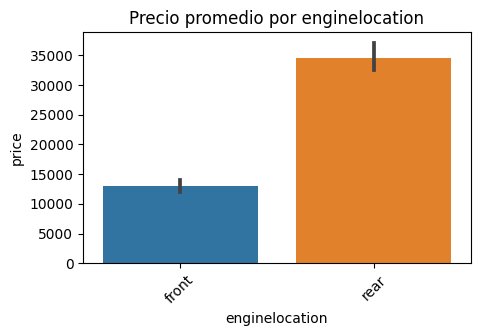

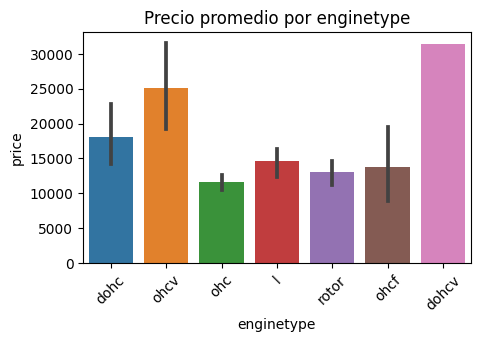

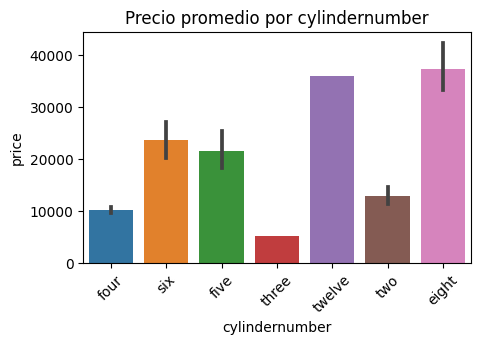

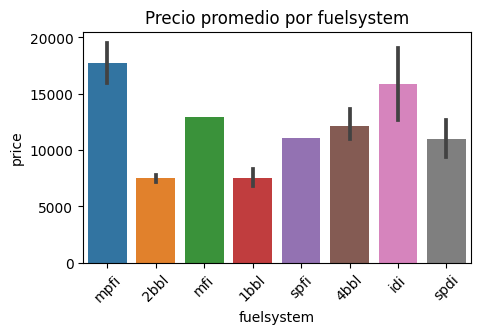

In [16]:
for columna_categorica in columnas_categoricas:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=columna_categorica, y='price', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Precio promedio por {columna_categorica}')
    plt.show()

In [17]:
#Define que variables numericas y categoricas usarás para crear tu modelo lineal.
use_vars=['horsepower', 'enginesize', 'drivewheel', 'boreratio', 'wheelbase', 'stroke']
categorical_vars=['fuelsystem', 'cylindernumber', 'enginetype', 'enginelocation', 'carbody']

In [18]:
#Convierte las variables categoricas en variables "dummy" usando el siguiente código
df1=df[use_vars]
df2_1 = pd.get_dummies(df['fuelsystem'])
df2_2 = pd.get_dummies(df['cylindernumber'])
df2_3 = pd.get_dummies(df['enginetype'])
df2_4 = pd.get_dummies(df['enginelocation'])
df2_5 = pd.get_dummies(df['carbody'])
df21 = np.hstack((df2_1,df2_2))
df22 = np.hstack((df21,df2_3))
df23 = np.hstack((df22, df2_4))
df2 = np.hstack((df23, df2_5))

<Axes: >

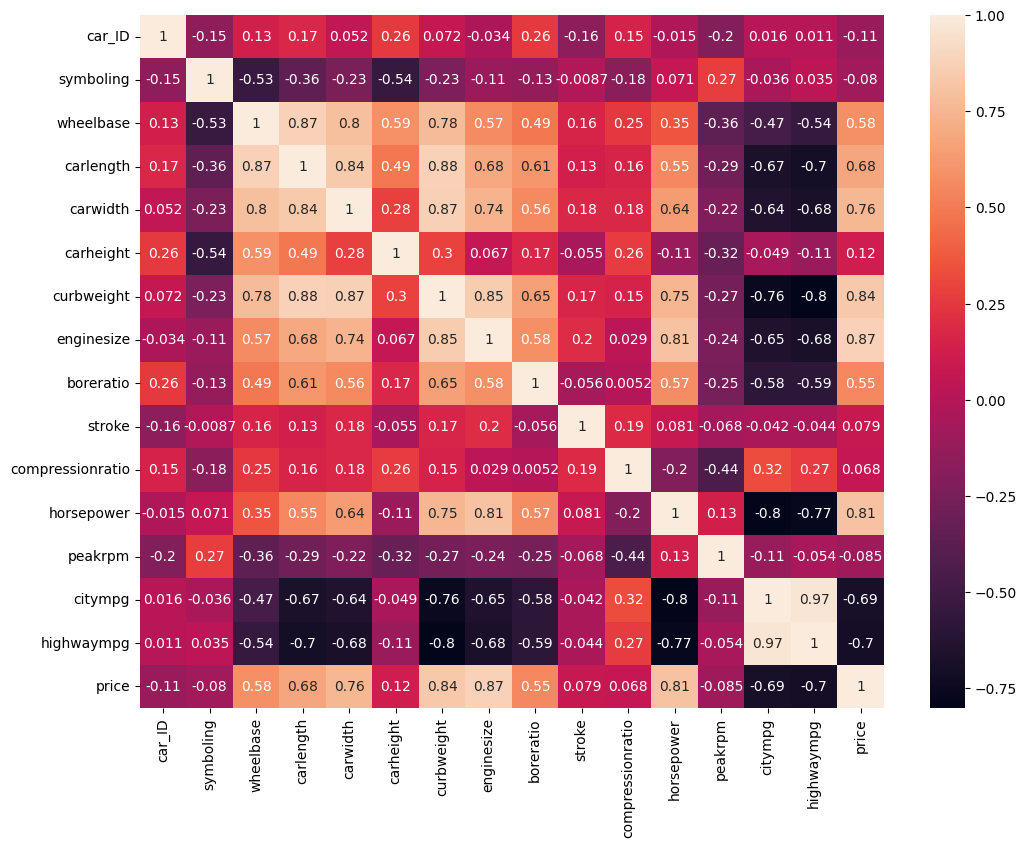

In [19]:
#Checa la correlación entre todas las variables usando un "heat map"
fig,ax=plt.subplots(1,1,figsize=(12,9))
sns.heatmap(df.corr(),annot=True)

In [20]:
#Construye la matriz de caracteristicas X y el vector de target t.
#Normaliza las caracteristicas y procede a generar el modelo.
# Usa el 20% de los datos como conjunto de validación
# Utiliza Keras () para que puedas analizar la dependencia de la función costo como función del parametro de aprendizaje, para diferentes valores, y decidas cual usar.
# Posteriormente utiliza scikit-learn para comprobar tu resultado

In [21]:
X = np.hstack((df1.drop('drivewheel', axis = 1),df2))
t = df['price']

In [27]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

In [26]:
sgdr = SGDRegressor(max_iter=100, learning_rate='constant', eta0=0.01)
sgdr.fit(X_norm, t)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100)
number of iterations completed: 7, number of weight updates: 1436.0


In [24]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [12292.78169031], b:[ 1570.31363576  1466.7905244    206.45608784  1976.05103508
  -659.50063867   351.96831105  -221.6413198     65.2697619
   698.42892069 -1016.09486284   174.17898547  -378.81954269
 -1854.63244387  3224.38905901   400.11889857 -1174.51424852
   978.29484947   975.5019316  -7705.43126062   410.62237051
   -75.69100709 -1643.47695967   391.47873944  1444.30944177
   218.75664339 -2956.40107232   410.62237051  -152.61070001
   152.61070001   916.07572421  -305.45611878  -489.37750427
   230.64469622    66.35657068]


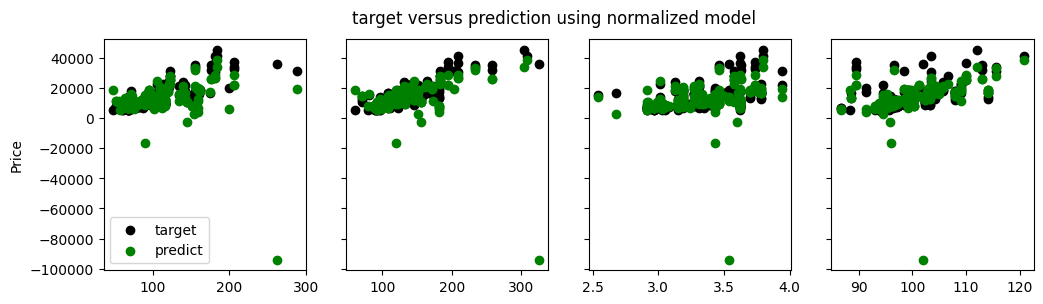

In [28]:
#predict target using normalized features
yp = w0_norm[0]
for i in range(len(w_norm)):
  yp+=w_norm[i]*X_norm[:,i]

    # plot predictions and targets versus original features
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],t, label = 'target', color = 'black')
    ax[i].scatter(X[:,i],yp,color="green", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using normalized model")
plt.show()

In [29]:
#Ahora lo hacemos para un conjunto de prueba del 20%
X_train, X_test, y_train, y_test = train_test_split(X_norm, t, test_size=0.20, random_state=42)

In [30]:
#Solve using Scikit learn

sgdr = SGDRegressor(max_iter=100, loss="squared_error",learning_rate='constant', eta0=0.01,penalty=None)
sgdr.fit(X_train, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(learning_rate='constant', max_iter=100, penalty=None)
number of iterations completed: 7, number of weight updates: 1149.0


In [31]:
w0_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w0_norm}, b:{w_norm}")

model parameters:                   w: [14884.32398344], b:[ 5209.75973801  5834.20693881    16.87707181  1446.69649942
 -1644.99543949   172.9665144    -58.23978014  -883.46367629
   840.47124196  2021.43618244  -833.57559072  -670.19191526
  3685.24546983   567.49637409  -505.40997877  -349.85724081
 -2511.63853747 -1042.11112191 16178.00995902  -540.36643069
  -417.66896672  5418.456757    -781.34092133   462.17234656
 -1186.63507197   330.91798549  -540.36643069  1381.06733357
 -1381.06733357  -606.15410641   271.51679963   346.23524908
   222.23887177  -689.08494873]


In [32]:
#Test score
sgdr.score(X_test,y_test)

0.39026504837328035

In [33]:
#Usando KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

np.random.seed(2)
model = Sequential()

In [34]:
input_dim = 34
output_dim = 1
model.add(Dense(output_dim, input_dim=input_dim, activation='linear'))
sgd = SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 35        
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
X_train.shape
y_train.shape

(164,)

In [36]:
num_epochs = 100
# batch_size =X_train.shape[0]
history = model.fit(X_train, y_train, epochs=num_epochs)

Epoch 1/100
6/6 [==============================] - 1s 10ms/step - loss: 210349024.0000
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 149392480.0000
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 111728952.0000
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 88823496.0000
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 70786464.0000
Epoch 6/100
6/6 [==============================] - 0s 5ms/step - loss: 56023652.0000
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 44997976.0000
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 37137996.0000
Epoch 9/100
6/6 [==============================] - 0s 6ms/step - loss: 30573366.0000
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 25882648.0000
Epoch 11/100
6/6 [==============================] - 0s 4ms/step - loss: 22143320.0000
Epoch 12/100
6/6 [==============================] - 0s 4ms/

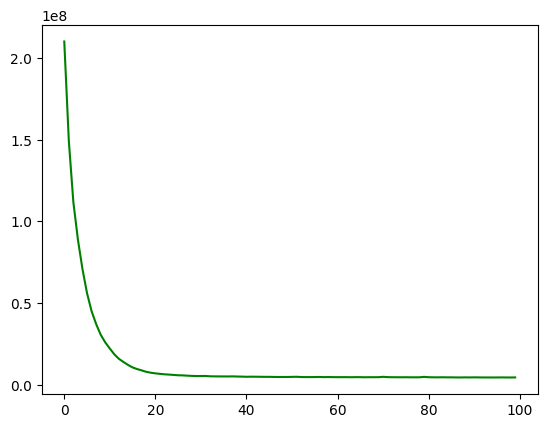

In [37]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot(color = 'green');

In [38]:
score = model.evaluate(X_test, y_test, verbose=0)
score

16718862.0

In [39]:
#Prueba con otros modelos, donde uses mas o menos caracteristicas. ¿cuál es el modelo que mejor desempeño tiene?